In [1]:
import numpy as np
import matplotlib.pyplot as plt

| 주차 | 일정                               | 페이지                                  |
|-----:|-----------------------------------|----------------------------------------|
|    1 | 1장-헬로 파이썬                     | 0p ~ 45p                               |
|    2 | 2장-퍼셉트론                        | 46p ~ 62p                              |
|    3 | 3장-신경망                          | 63p ~ 105p                             |
|    4 | 4장-신경망 학습                     | 106p ~ 146p                            |
|    5 | 5장-오차역전파법                    | 147p ~ 187p (+ Appendix A, 292p ~ 299p) |
|    6 | 중간고사(전)                        |                                        |
|    7 | 중간고사                           |                                        |
|    8 | 6장-학습 관련 기술들               | 188p ~ 226p                            |
|    9 | 7장-합성곱 신경망(CNN)             | 227p ~ 259p                            |
|   10 | 딥러닝                             | 261p ~ 308p                            |
|   11 | 1장-신경망 복습                    | 0p ~ 74p (+ Appendix A, 389p ~ 394p)  |
|   12 | 2장-자연어와 단어의 분산 표현      | 78p ~ 113p (+ Appendix B, 395p ~ 399p) |
|   13 | 기말고사(전)                       |                                        |
|   14 | 기말고사                          |                                        |
|   15 | 3장-word2vec                       | 114p ~ 147p                            |
|   16 | 4장-word2vec 속도 개선             | 148p ~ 189p                            |
|   17 | 5장-순환신경망(RNN)                | 190p ~ 235p                            |
|   18 | 6장-게이트가 추가된 RNN            | 263p ~ 286p (+ Appendix C, 401p ~ 402p)|
|   19 | 7장-RNN을 사용한 문장 생성         | 287p ~ 333p                            |
|   20 | 8장-어텐션                         | 334p ~ 387p                            |

# 11주차

신경망 복습

_0~72p_

---

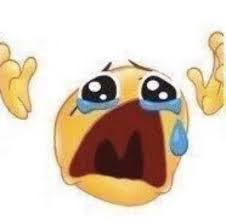
## 수학 & 파이썬 복습

1차원 `numpy.ndarray`

In [ ]:
x = np.array([i for i in range(5)])

x, x.__class__, x.shape, x.ndim

(array([0, 1, 2, 3, 4]), numpy.ndarray, (5,), 1)

2차원 `numpy.ndarray`

In [8]:
W = np.array([x, x])
W, W.shape, W.ndim

(array([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]),
 (2, 5),
 2)

**행렬 연산**

원소별 연산

In [10]:
W = np.array([[1, 2, 3], [4, 5, 6]])
X = np.array([[0, 1, 2], [3, 4, 5]])

W + X, W * X

(array([[ 1,  3,  5],
        [ 7,  9, 11]]),
 array([[ 0,  2,  6],
        [12, 20, 30]]))

Broadcasting

In [11]:
W * 10

array([[10, 20, 30],
       [40, 50, 60]])

**note:** broadcasting 충족 조건

In [21]:
def is_broadcastable(arr1: np.ndarray, arr2: np.ndarray) -> bool:
    for a, b in zip(arr1.shape[::-1], arr2.shape[::-1]):
        if a == 1 or b == 1 or a == b:
            pass
        else:
            return False
    return True

is_broadcastable(W, np.array(5)), is_broadcastable(W, np.array([[0, 1, 2]])), is_broadcastable(W, np.array([[0, 1]]))

(True, True, False)

행렬곱 - dot product

(`dot`, `matmul`은 약간의 방식차이만 있을뿐 결과랑 성능 거의 비슷)

In [23]:
np.dot(np.array([[7, 8], [9, 10]]), X)

array([[24, 39, 54],
       [30, 49, 68]])

In [24]:
np.matmul(np.array([[7, 8], [9, 10]]), X)

array([[24, 39, 54],
       [30, 49, 68]])

## 신경망의 학습

**손실함수:**

다중 클래스 분류를 위해서는 `Categorical Corss Entropy Error`를 사용한다.
(값의 범위에따라 `Sparse Categorical Corss Entropy Error` 일수도)

